# Vector Autoregressive 

In [1]:
import pandas as pd
import numpy as np

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import acf, pacf, grangercausalitytests

## Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

import yfinance as yf

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

## Read the file

In [2]:
df = pd.read_csv('../Data/dataset_others.csv')
# Extract _change_in_price columns
change_in_price_cols = [col for col in df.columns if '_change_in_price' in col]
df_change = df[change_in_price_cols].copy()

In [3]:
df_change

,CADUSD=X_change_in_price,GM_change_in_price,JCI_change_in_price,TM_change_in_price,TRYUSD=X_change_in_price,^IXIC_change_in_price,F_change_in_price
0,-0.000418,0.099998,0.330002,-0.569992,-0.000812,15.439453,0.010000
1,0.001932,0.230000,0.160000,-0.309998,-0.000532,57.250000,0.090000
2,-0.000607,-0.139999,-0.279999,-1.449997,0.000039,-39.709961,-0.040000
3,-0.000238,-0.119999,-0.560001,0.059998,0.000314,-97.479492,-0.050000
4,-0.001081,-0.350002,-0.480000,0.459991,0.000223,-47.350586,-0.120000
...,...,...,...,...,...,...,...
1232,-0.001776,4.799999,-0.529999,0.759995,0.000026,39.759766,0.230000
1233,0.000905,-0.810001,-0.159996,1.400009,-0.000006,-303.119141,-0.049999
1234,-0.001072,-0.199997,0.379997,-0.900009,-0.000013,138.839844,0.179999
1235,-0.000866,-0.650002,-0.120003,1.570007,-0.000016,103.119141,-0.170000


## Tickers list

In [4]:
tickers = []
for col in df.columns:
    if '_RSI' in col:
        tickers.append(col.split('_')[0])

tickers.pop()

'F'

## Train - test set

In [5]:
# Train set for cross-validation
train = df_change.iloc[:-5].copy()
# Test set is saved for the best model
test = df_change.iloc[-5:].copy()

## Cross validation for each ticker model

In [6]:
## Test
df_test = df_change[['F_change_in_price', 'GM_change_in_price']]

# Train set for cross-validation
train_test = df_test.iloc[:-5].copy()
# Test set is saved for the best model
test_test = df_test.iloc[-5:].copy()

cv = TimeSeriesSplit(10, test_size=5)
MSE = np.zeros(40) # Smallest order should be 1

for train_index, test_index in cv.split(train_test):
    t_tt = train_test.iloc[train_index]
    t_ho = train_test.iloc[test_index]
    model = VAR(t_tt)
    for i in range(1, 41):
        var_model = model.fit(i)
        pred = var_model.forecast(t_tt[-i:].values, steps=5)
        MSE[i - 1] = np.sqrt(mean_squared_error(t_ho['F_change_in_price'].values, pred[:, 0]))

order_optimal = np.argmin(MSE) + 1

In [7]:
MSE

array([0.13739331, 0.13458652, 0.13366308, 0.12661237, 0.12812163,
       0.12954037, 0.12711169, 0.12143149, 0.12191102, 0.12018846,
       0.11872364, 0.11582741, 0.116997  , 0.12224228, 0.11686215,
       0.11724692, 0.13767682, 0.13759634, 0.12031377, 0.12560544,
       0.12594169, 0.12461681, 0.13660581, 0.13837208, 0.14369521,
       0.1428337 , 0.14319373, 0.13815179, 0.13867744, 0.13178538,
       0.13647811, 0.13568821, 0.13197315, 0.1315245 , 0.13030578,
       0.1193876 , 0.14046661, 0.14534909, 0.16048401, 0.16014163])

In [8]:
order_optimal

np.int64(12)

In [9]:
def best_VAR(train, forecast_length = 5):
    cv = TimeSeriesSplit(10, test_size=forecast_length)
    MSE = np.zeros(40) # Smallest order should be 1

    for train_index, test_index in cv.split(train):
        t_tt = train.iloc[train_index]
        t_ho = train.iloc[test_index]
        model = VAR(t_tt)
        for i in range(1, 41):
            var_model = model.fit(i)
            pred = var_model.forecast(t_tt[-i:].values, steps=forecast_length)
            MSE[i - 1] = np.sqrt(mean_squared_error(t_ho['F_change_in_price'].values, pred[:, 0]))
    
    order_optimal = np.argmin(MSE) + 1
    return order_optimal

In [10]:
train

,CADUSD=X_change_in_price,GM_change_in_price,JCI_change_in_price,TM_change_in_price,TRYUSD=X_change_in_price,^IXIC_change_in_price,F_change_in_price
0,-0.000418,0.099998,0.330002,-0.569992,-0.000812,15.439453,0.010000
1,0.001932,0.230000,0.160000,-0.309998,-0.000532,57.250000,0.090000
2,-0.000607,-0.139999,-0.279999,-1.449997,0.000039,-39.709961,-0.040000
3,-0.000238,-0.119999,-0.560001,0.059998,0.000314,-97.479492,-0.050000
4,-0.001081,-0.350002,-0.480000,0.459991,0.000223,-47.350586,-0.120000
...,...,...,...,...,...,...,...
1227,-0.001141,-0.780003,-1.080002,-5.550003,0.000020,-187.099609,-0.080000
1228,0.001146,1.160000,-0.209999,1.949997,0.000049,51.490234,0.190000
1229,0.001377,0.370003,0.860001,-0.300003,0.000026,6.529297,0.040000
1230,-0.002145,-0.200001,0.190002,0.330002,-0.000024,115.941406,0.030001


In [11]:
order_optimal = np.zeros(len(tickers))
order_optimal

array([0., 0., 0., 0., 0., 0.])

In [12]:
order_optimal

array([0., 0., 0., 0., 0., 0.])

## Compute optimal lag

In [13]:
c = ['Ticker', 'Optimal order', 'Accuracy']
accuracy = pd.DataFrame(columns=c)
accuracy

,Ticker,Optimal order,Accuracy


In [14]:
for i, t in enumerate(tickers):
    accuracy.loc[i, 'Ticker'] = t.split('_')[0]

accuracy

,Ticker,Optimal order,Accuracy
0,CADUSD=X,NaN,NaN
1,GM,NaN,NaN
2,JCI,NaN,NaN
3,TM,NaN,NaN
4,TRYUSD=X,NaN,NaN
5,^IXIC,NaN,NaN


In [15]:
for i in range(len(change_in_price_cols) - 1):
    tr_set = train[[change_in_price_cols[-1], change_in_price_cols[i]]]
    accuracy.loc[i, 'Optimal order'] = best_VAR(tr_set, 5)

In [16]:
accuracy

,Ticker,Optimal order,Accuracy
0,CADUSD=X,12,NaN
1,GM,12,NaN
2,JCI,15,NaN
3,TM,22,NaN
4,TRYUSD=X,2,NaN
5,^IXIC,15,NaN


## Compute VAR predictions

In [17]:
prediction_cols = []
for t in tickers:
    prediction_cols.append(t + '_VAR')

prediction_cols

['CADUSD=X_VAR', 'GM_VAR', 'JCI_VAR', 'TM_VAR', 'TRYUSD=X_VAR', '^IXIC_VAR']

In [18]:
predictions = pd.DataFrame(columns=prediction_cols, index=test.index)

In [19]:
predictions

,CADUSD=X_VAR,GM_VAR,JCI_VAR,TM_VAR,TRYUSD=X_VAR,^IXIC_VAR
1232,NaN,NaN,NaN,NaN,NaN,NaN
1233,NaN,NaN,NaN,NaN,NaN,NaN
1234,NaN,NaN,NaN,NaN,NaN,NaN
1235,NaN,NaN,NaN,NaN,NaN,NaN
1236,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
tickers

['CADUSD=X', 'GM', 'JCI', 'TM', 'TRYUSD=X', '^IXIC']

In [21]:
accuracy.loc[i, 'Optimal order']

np.int64(15)

In [22]:
for i in range(6):
    t = prediction_cols[i]
    train_fit = train[[change_in_price_cols[-1], change_in_price_cols[i]]].copy()
    model = VAR(train_fit)
    k = accuracy.loc[i, 'Optimal order']
    results = model.fit(k)
    predictions.loc[:, t] = results.forecast(train_fit.values[-k:], steps=5)[:, 0]

In [23]:
predictions

,CADUSD=X_VAR,GM_VAR,JCI_VAR,TM_VAR,TRYUSD=X_VAR,^IXIC_VAR
1232,-0.033737,-0.012626,0.029559,0.022957,-0.007467,0.088103
1233,-0.039427,-0.008978,-0.070183,0.068173,-0.001447,-0.010875
1234,-0.07565,-0.035802,0.054384,0.019441,0.001707,0.004646
1235,0.001048,-0.024874,0.05439,-0.065639,0.000836,0.025414
1236,-0.016464,-0.016876,-0.02205,0.015446,0.001415,-0.018408


In [24]:
VAR_change_in_price = predictions.copy()

In [25]:
predictions = pd.concat([predictions, test['F_change_in_price']], axis=1)

In [26]:
predictions

,CADUSD=X_VAR,GM_VAR,JCI_VAR,TM_VAR,TRYUSD=X_VAR,^IXIC_VAR,F_change_in_price
1232,-0.033737,-0.012626,0.029559,0.022957,-0.007467,0.088103,0.230000
1233,-0.039427,-0.008978,-0.070183,0.068173,-0.001447,-0.010875,-0.049999
1234,-0.07565,-0.035802,0.054384,0.019441,0.001707,0.004646,0.179999
1235,0.001048,-0.024874,0.05439,-0.065639,0.000836,0.025414,-0.170000
1236,-0.016464,-0.016876,-0.02205,0.015446,0.001415,-0.018408,0.300000


## Compute F_close from VAR predictions change_in_price

In [27]:
df_close = df[['F_Close_pred']].copy()
#df_close['VAR'] = df[['F_Close_pred']].copy()
df_close[-5:] 

,F_Close_pred
1232,11.11
1233,11.06
1234,11.24
1235,11.07
1236,11.37


In [28]:
len(df_close)

1237

In [29]:
VAR_change_in_price

,CADUSD=X_VAR,GM_VAR,JCI_VAR,TM_VAR,TRYUSD=X_VAR,^IXIC_VAR
1232,-0.033737,-0.012626,0.029559,0.022957,-0.007467,0.088103
1233,-0.039427,-0.008978,-0.070183,0.068173,-0.001447,-0.010875
1234,-0.07565,-0.035802,0.054384,0.019441,0.001707,0.004646
1235,0.001048,-0.024874,0.05439,-0.065639,0.000836,0.025414
1236,-0.016464,-0.016876,-0.02205,0.015446,0.001415,-0.018408


In [30]:
n = len(df_close)
for t in VAR_change_in_price.columns:
    VAR_change_in_price.loc[n - 5, t] += df_close.loc[n - 1, 'F_Close_pred'] 

In [31]:
VAR_change_in_price

,CADUSD=X_VAR,GM_VAR,JCI_VAR,TM_VAR,TRYUSD=X_VAR,^IXIC_VAR
1232,11.336263,11.357374,11.399559,11.392957,11.362532,11.458103
1233,-0.039427,-0.008978,-0.070183,0.068173,-0.001447,-0.010875
1234,-0.07565,-0.035802,0.054384,0.019441,0.001707,0.004646
1235,0.001048,-0.024874,0.05439,-0.065639,0.000836,0.025414
1236,-0.016464,-0.016876,-0.02205,0.015446,0.001415,-0.018408


In [32]:
VAR_change_in_price.index

RangeIndex(start=1232, stop=1237, step=1)

In [33]:
for t in VAR_change_in_price.columns:
    for i in range(n - 4, n):
        VAR_change_in_price.loc[i, t] += VAR_change_in_price.loc[i - 1, t]

In [34]:
VAR_change_in_price

,CADUSD=X_VAR,GM_VAR,JCI_VAR,TM_VAR,TRYUSD=X_VAR,^IXIC_VAR
1232,11.336263,11.357374,11.399559,11.392957,11.362532,11.458103
1233,11.296837,11.348396,11.329376,11.46113,11.361085,11.447228
1234,11.221186,11.312595,11.38376,11.480571,11.362792,11.451874
1235,11.222234,11.28772,11.43815,11.414932,11.363628,11.477287
1236,11.20577,11.270844,11.416101,11.430378,11.365044,11.458879


In [36]:
df_close[-5:]

,F_Close_pred
1232,11.11
1233,11.06
1234,11.24
1235,11.07
1236,11.37


## Plotting

[]

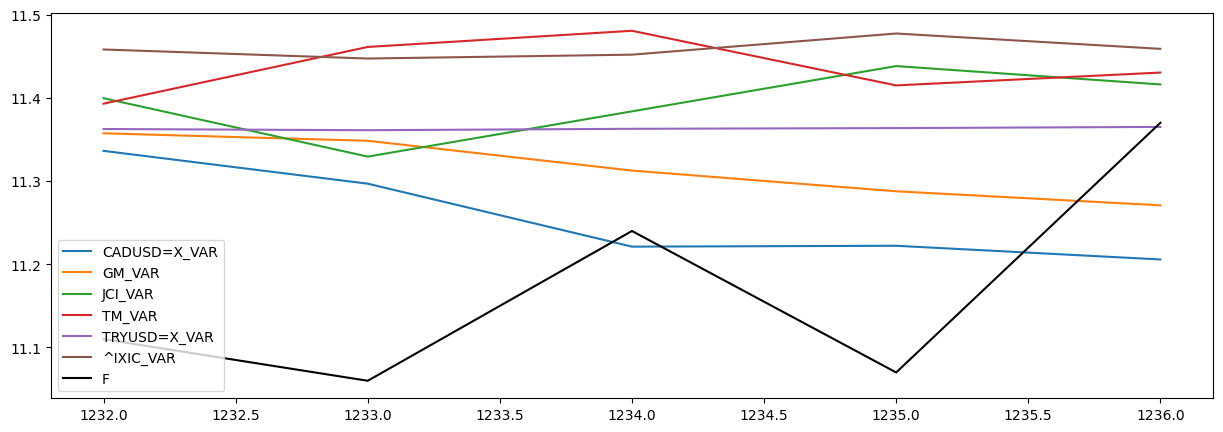

In [45]:
plt.figure(figsize=(15, 5))
#plt.plot(df_close)
for t in VAR_change_in_price.columns:
    plt.plot(VAR_change_in_price[t], label = t)
plt.plot(df_close[-5:], color='k', label = 'F')
plt.legend()
plt.plot()
#plt.set_xlim(1000, 1236)

## Compute accuracy

In [46]:
accuracy

,Ticker,Optimal order,Accuracy
0,CADUSD=X,12,NaN
1,GM,12,NaN
2,JCI,15,NaN
3,TM,22,NaN
4,TRYUSD=X,2,NaN
5,^IXIC,15,NaN


In [48]:
predictions

,CADUSD=X_VAR,GM_VAR,JCI_VAR,TM_VAR,TRYUSD=X_VAR,^IXIC_VAR,F_change_in_price
1232,-0.033737,-0.012626,0.029559,0.022957,-0.007467,0.088103,0.230000
1233,-0.039427,-0.008978,-0.070183,0.068173,-0.001447,-0.010875,-0.049999
1234,-0.07565,-0.035802,0.054384,0.019441,0.001707,0.004646,0.179999
1235,0.001048,-0.024874,0.05439,-0.065639,0.000836,0.025414,-0.170000
1236,-0.016464,-0.016876,-0.02205,0.015446,0.001415,-0.018408,0.300000


In [53]:
sum(predictions['CADUSD=X_VAR']*predictions['F_change_in_price'] > 0)

1

In [54]:
for i in range(6):
    t = accuracy.loc[i, 'Ticker'] + '_VAR'
    accuracy.loc[i, 'Accuracy'] = sum(predictions[t]*predictions['F_change_in_price'] > 0)/5

In [55]:
accuracy

,Ticker,Optimal order,Accuracy
0,CADUSD=X,12,0.2
1,GM,12,0.4
2,JCI,15,0.6
3,TM,22,0.8
4,TRYUSD=X,2,0.6
5,^IXIC,15,0.6


We concluded that TM yields 